### GRONESTATS
Utilizamos ScraperFC de mi repositorio en GitHub ya que tiene incluidos los datos de la Liga 1 Max de Peru

In [2]:
import ScraperFC as sfc
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch, Pitch

In [3]:
sofascore = sfc.Sofascore()

In [4]:
dfLiga1 = sofascore.scrape_league_stats("2024","Peru Liga 1")

End of the pages


In [5]:
# Mostrar el nombre de las columnas
print(dfLiga1.columns)

Index(['goals', 'yellowCards', 'redCards', 'groundDuelsWon',
       'groundDuelsWonPercentage', 'aerialDuelsWon',
       'aerialDuelsWonPercentage', 'successfulDribbles',
       'successfulDribblesPercentage', 'tackles', 'assists',
       'accuratePassesPercentage', 'totalDuelsWon', 'totalDuelsWonPercentage',
       'minutesPlayed', 'wasFouled', 'fouls', 'dispossessed', 'appearances',
       'saves', 'savedShotsFromInsideTheBox', 'savedShotsFromOutsideTheBox',
       'goalsConcededInsideTheBox', 'goalsConcededOutsideTheBox', 'highClaims',
       'successfulRunsOut', 'punches', 'runsOut', 'accurateFinalThirdPasses',
       'bigChancesCreated', 'accuratePasses', 'keyPasses', 'accurateCrosses',
       'accurateCrossesPercentage', 'accurateLongBalls',
       'accurateLongBallsPercentage', 'interceptions', 'clearances',
       'dribbledPast', 'bigChancesMissed', 'totalShots', 'shotsOnTarget',
       'blockedShots', 'goalConversionPercentage', 'hitWoodwork', 'offsides',
       'expectedGoals

In [6]:
# Mostrar la cantidad de filas y columnas
print(f'El DataFrame tiene {dfLiga1.shape[0]} filas y {dfLiga1.shape[1]} columnas.')

El DataFrame tiene 349 filas y 52 columnas.


# FUNCIONES PARA OBTENER LOS DATOS DE 
- DATOS_PARTIDO: ESTADISTICAS DE EQUIPO 
- DATOS_JUGADORES: ESTADISTICAS DE JUGADOR
- POSICION_JUGADORES: POSICION PROMEDIO DE EQUIPO
- MATCH_MOMENTUM: PRESION DEL PARTIDO

In [7]:
def obtener_datos_partido(url, condicion):
    # Obtener estadísticas generales del partido usando la URL
    df = sofascore.get_general_match_stats(url)
    
    # Seleccionar columnas basado en si Alianza Lima juega de local o visita
    if condicion == "Local":
        df_resultado = df[['name', 'homeValue', 'homeTotal']]
    elif condicion == "Visita":
        df_resultado = df[['name', 'awayValue', 'awayTotal']]
    else:
        raise ValueError("La condición debe ser 'Local' o 'Visita'")
    
    return df_resultado

In [8]:
def obtener_datos_jugadores_jornada (url, condicion):
    # Obtiene los datos de los jugadores
    df = sofascore.get_players_match_stats(url)

    # Seleccionar columnas basado en si Alianza Lima juega de local o visita
    if condicion == "Local":
        df_resultado = df[0]
    elif condicion == "Visita":
        df_resultado = df[1]
    else:
        raise ValueError("La condición debe ser 'Local' o 'Visita'")
    return df_resultado

In [9]:
def obtener_posicion_jugadores (url, condicion):
    # Obtiene la posicion promedio de los jugadores
    df = sofascore.get_players_average_positions(url)
    # Seleccionar columnas basado en si Alianza Lima juega de local o visita
    if condicion == "Local":
        df_resultado = df[0]
    elif condicion == "Visita":
        df_resultado = df[1]
    else:
        raise ValueError("La condición debe ser 'Local' o 'Visita'")
    return df_resultado

In [10]:
def obtener_match_momentum (url):
    # Obtiene los datos de los jugadores
    df = sofascore.match_momentum(url)

    return df

# OBTENCION DE DATOS DE CADA JORNADA 2024

In [11]:
#Agregar las URLs de las jornadas individuales, quitar "id:"
URL_J1_AL= "https://www.sofascore.com/universidad-cesar-vallejo-alianza-lima/lWsGfc#11967822"
URL_J2_AL="https://www.sofascore.com/alianza-lima-alianza-atletico-de-sullana/hWslW#11981247"
URL_J3_AL="https://www.sofascore.com/alianza-lima-universitario-de-deportes/fWslW#12005095"
URL_J4_AL="https://www.sofascore.com/union-comercio-alianza-lima/lWsGtu#12019977"

In [12]:
J1_AL_Local_df = obtener_datos_partido(URL_J1_AL, "Local")
J2_AL_Visita_df = obtener_datos_partido(URL_J2_AL, "Visita")
J3_AL_Local_df = obtener_datos_partido(URL_J3_AL, "Local")
J4_AL_Visita_df = obtener_datos_partido(URL_J4_AL, "Visita")


In [13]:
J1_AL_Jugadores_df = obtener_datos_jugadores_jornada(URL_J1_AL, "Local")
J2_AL_Jugadores_df = obtener_datos_jugadores_jornada(URL_J2_AL, "Visita")
J3_AL_Jugadores_df = obtener_datos_jugadores_jornada(URL_J3_AL, "Local")
J4_AL_Jugadores_df = obtener_datos_jugadores_jornada(URL_J4_AL, "Visita")

In [14]:
J1_AL_Pos_Jugadores_df = obtener_posicion_jugadores(URL_J1_AL, "Local")
J2_AL_Pos_Jugadores_df = obtener_posicion_jugadores(URL_J2_AL, "Visita")
J3_AL_Pos_Jugadores_df = obtener_posicion_jugadores(URL_J3_AL, "Local")
J4_AL_Pos_Jugadores_df = obtener_posicion_jugadores(URL_J4_AL, "Visita")

In [16]:
J1_AL_Momentum_Graph = obtener_match_momentum(URL_J1_AL)
J2_AL_Momentum_Graph = obtener_match_momentum(URL_J2_AL)
J3_AL_Momentum_Graph = obtener_match_momentum(URL_J3_AL)
J4_AL_Momentum_Graph = obtener_match_momentum(URL_J4_AL)

## PREPROCESAMIENTO DATOS GENERALES DEL EQUIPO 2024
Seccionamos el DataFrame de la Liga1 para trabajar unicamente con el equipo Alianza Lima de 2024.

In [17]:
alianza_lima_df = dfLiga1[dfLiga1['team'] == 'Alianza Lima']

In [18]:
# Elimina la columna 'team' del DataFrame
alianza_lima_df_jugadores = alianza_lima_df.drop(columns=['team'])

In [19]:
print(alianza_lima_df_jugadores)


    goals  yellowCards  redCards  groundDuelsWon  groundDuelsWonPercentage  \
10      1            0         0              11                     64.71   
31      0            0         0               8                     57.14   
32      3            0         0              11                     50.00   
57      0            0         0              11                     61.11   
74      0            0         0               7                     58.33   
86      0            0         1              12                     66.67   
91      0            1         0               8                     72.73   
22      1            0         0               8                     36.36   
23      1            1         0               8                     32.00   
26      0            0         0              19                     52.78   
95      0            1         0               7                     50.00   
10      0            1         0               5                

## PREPOCESAMIENTO DE DATOS DE CADA JUGADOR DEL EQUIPO

In [ ]:
# Eliminamos columnas inutiles y otras que no han recibido informacion
J1_AL_Jugadores_df = J1_AL_Jugadores_df.dropna(axis=1, how='all')
J1_AL_Jugadores_df = J1_AL_Jugadores_df.drop(['ratingVersions','shirtNumber','marketValueCurrency','userCount', 'slug', 'userCount', 'id', 'dateOfBirthTimestamp','firstName','lastName','team'], axis=1)

J2_AL_Jugadores_df = J2_AL_Jugadores_df.dropna(axis=1, how='all')
J2_AL_Jugadores_df = J2_AL_Jugadores_df.drop(['ratingVersions','shirtNumber','marketValueCurrency','userCount', 'slug', 'userCount', 'id', 'dateOfBirthTimestamp','firstName','lastName','team'], axis=1)

J3_AL_Jugadores_df = J3_AL_Jugadores_df.dropna(axis=1, how='all')
J3_AL_Jugadores_df = J3_AL_Jugadores_df.drop(['ratingVersions','shirtNumber','marketValueCurrency','userCount', 'slug', 'userCount', 'id', 'dateOfBirthTimestamp','firstName','lastName','team'], axis=1)

J4_AL_Jugadores_df = J4_AL_Jugadores_df.dropna(axis=1, how='all')
J4_AL_Jugadores_df = J4_AL_Jugadores_df.drop(['ratingVersions','shirtNumber','marketValueCurrency','userCount', 'slug', 'userCount', 'id', 'dateOfBirthTimestamp','firstName','lastName','team'], axis=1)


In [ ]:
# Eliminar columnas duplicadas

J1_AL_Jugadores_df = J1_AL_Jugadores_df.loc[:, ~J1_AL_Jugadores_df.columns.duplicated()]
J2_AL_Jugadores_df = J2_AL_Jugadores_df.loc[:, ~J2_AL_Jugadores_df.columns.duplicated()]
J3_AL_Jugadores_df = J3_AL_Jugadores_df.loc[:, ~J3_AL_Jugadores_df.columns.duplicated()]
J4_AL_Jugadores_df = J4_AL_Jugadores_df.loc[:, ~J4_AL_Jugadores_df.columns.duplicated()]

In [ ]:
# Cambiar el pais

J1_AL_Jugadores_df['country'] = J1_AL_Jugadores_df['country'].apply(
    lambda x: x['name'] if isinstance(x, dict) else None
)
J2_AL_Jugadores_df['country'] = J2_AL_Jugadores_df['country'].apply(
    lambda x: x['name'] if isinstance(x, dict) else None
)
J3_AL_Jugadores_df['country'] = J3_AL_Jugadores_df['country'].apply(
    lambda x: x['name'] if isinstance(x, dict) else None
)
J4_AL_Jugadores_df['country'] = J4_AL_Jugadores_df['country'].apply(
    lambda x: x['name'] if isinstance(x, dict) else None
)


In [ ]:
J1_AL_Jugadores_df = J1_AL_Jugadores_df.fillna('0.0')
J2_AL_Jugadores_df = J2_AL_Jugadores_df.fillna('0.0')
J3_AL_Jugadores_df = J3_AL_Jugadores_df.fillna('0.0')
J4_AL_Jugadores_df = J4_AL_Jugadores_df.fillna('0.0')

In [ ]:
J1_AL_Pos_Jugadores_df.dropna()
J2_AL_Pos_Jugadores_df.dropna()
J3_AL_Pos_Jugadores_df.dropna()
J4_AL_Pos_Jugadores_df.dropna()

,name,slug,shortName,position,jerseyNumber,userCount,id,firstName,lastName,averageX,averageY,pointsCount,team
1,Ángel De la Cruz,angel-de-la-cruz,Á. D. l. Cruz,G,12,10,1109887,Ángel De la Cruz,,8.921739,51.747826,46,Alianza Lima
2,Catriel Cabellos,cabellos-catriel,C. Cabellos,M,27,313,1415942,Catriel Cabellos,,45.543590,19.328205,39,Alianza Lima
3,Jesús Castillo,jesus-castillo,J. Castillo,M,15,81,913398,,,51.546154,39.507692,13,Alianza Lima
4,Juan Freytes,juan-freytes,J. Freytes,D,2,44,962187,,,39.205172,64.524138,58,Alianza Lima
11,Kevin Serna,serna-kevin,K. Serna,M,26,95,981374,,,53.357407,22.820370,54,Alianza Lima
14,Gabriel Costa,gabriel-costa,G. Costa,M,8,573,590312,,,60.310769,46.178462,65,Alianza Lima


## PREPROCESAMIENTO DE DATOS DEL EQUIPO

In [ ]:
J1_AL_Jugadores_df.columns

Index(['name', 'shortName', 'position', 'jerseyNumber', 'country',
       'substitute', 'totalPass', 'accuratePass', 'totalLongBalls',
       'accurateLongBalls', 'minutesPlayed', 'touches', 'rating',
       'possessionLostCtrl', 'keyPass', 'totalCross', 'accurateCross',
       'aerialLost', 'aerialWon', 'duelLost', 'duelWon', 'challengeLost',
       'shotOffTarget', 'totalClearance', 'interceptionWon', 'totalTackle',
       'wasFouled', 'fouls', 'totalOffside', 'dispossessed', 'totalContest',
       'wonContest', 'onTargetScoringAttempt', 'goalAssist', 'bigChanceMissed',
       'blockedScoringAttempt', 'bigChanceCreated', 'goals', 'hitWoodwork',
       'captain'],
      dtype='object')

In [ ]:
#Adecuar las tablas
J1_AL_Local_df = J1_AL_Local_df.fillna('-')
J1_AL_Local_df = J1_AL_Local_df.rename(columns={'name': 'Estadistica', 'homeValue': 'Completado', 'homeTotal': 'Intentado',
                                                        'awayValue': 'Completado', 'awayTotal': 'Intentado'})
J2_AL_Visita_df = J2_AL_Visita_df.fillna('-')
J2_AL_Visita_df = J2_AL_Visita_df.rename(columns={'name': 'Estadistica', 'homeValue': 'Completado', 'homeTotal': 'Intentado',
                                                        'awayValue': 'Completado', 'awayTotal': 'Intentado'})
J3_AL_Local_df = J3_AL_Local_df.fillna('-')
J3_AL_Local_df = J3_AL_Local_df.rename(columns={'name': 'Estadistica', 'homeValue': 'Completado', 'homeTotal': 'Intentado',
                                                        'awayValue': 'Completado', 'awayTotal': 'Intentado'})
J4_AL_Visita_df = J4_AL_Visita_df.fillna('-')
J4_AL_Visita_df = J4_AL_Visita_df.rename(columns={'name': 'Estadistica', 'homeValue': 'Completado', 'homeTotal': 'Intentado',
                                                        'awayValue': 'Completado', 'awayTotal': 'Intentado'})

# IMPRESION DE DATOS RECOPILADOS

In [24]:
#Exportar los datos a CSV

import os

def exportar_dataframes_a_csv(jornadas_df, jornadas_jugadores_df, alianza_lima_df_jugadores, directorio=r'C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\CSV obtenidos\\'):
    """
    Exporta los DataFrames de las estadisticas de jornadas y jugadores de Alianza Lima a archivos CSV.

    Args:
    - jornadas_df: Diccionario de DataFrames de las estadísticas de las jornadas.
    - jornadas_jugadores_df: Diccionario de DataFrames de los jugadores por jornada.
    - directorio: Ruta del directorio donde se guardarán los archivos CSV.
    """
    # Crear el directorio si no existe
    if not os.path.exists(directorio):
        os.makedirs(directorio)
    
    nombre_archivo = f'AL_Datos_Generales.csv'
    alianza_lima_df_jugadores.to_csv(directorio + nombre_archivo, index=False)
    print(f'Exportado AL_Datos_Generales.csv a {directorio}{nombre_archivo}')

    i = 1  # Inicializar el contador fuera de los bucles for

    # Exportar DataFrames del rendimiento del equipo en cada jornada
    for nombre_jornada, df in jornadas_df.items():
        nombre_archivo = f'AL_J{i}_estadisticas.csv'
        df.to_csv(directorio + nombre_archivo, index=False)
        print(f'Exportado "{nombre_jornada}" a {directorio}{nombre_archivo}')
        i += 1  # Incrementar el contador después de cada iteración

    # Reiniciar el contador para los DataFrames de jugadores
    i = 1

    # Exportar DataFrames del rendimiento de los jugadores
    for nombre_jornada, df in jornadas_jugadores_df.items():
        nombre_archivo = f'AL_J{i}_jugadores.csv'
        df.to_csv(directorio + nombre_archivo, index=False)
        print(f'Exportado "{nombre_jornada}" a {directorio}{nombre_archivo}')
        i += 1  # Incrementar el contador después de cada iteración


In [22]:
# Actualizacion de dataframes
jornadas_df = {
    'Jornada 1 - Local vs Universidad Cesar Vallejo': J1_AL_Local_df,
    'Jornada 2 - Visita vs Alianza Atlético de Sullana': J2_AL_Visita_df, 
    'Jornada 3 - Local vs Universitario de Deportes': J3_AL_Local_df,
    'Jornada 4 - Visita vs Unión Comercio': J4_AL_Visita_df,
    #'Jornada 5 - Local vs Comerciantes Unidos': J5_AL_Local_df,
}
jornadas_jugadores_df = {
    'Jornada 1 - Local vs Universidad Cesar Vallejo': J1_AL_Jugadores_df,
    'Jornada 2 - Visita vs Alianza Atlético de Sullana': J2_AL_Jugadores_df,
    'Jornada 3 - Local vs Universitario de Deportes': J3_AL_Jugadores_df,
    'Jornada 4 - Visita vs Unión Comercio': J4_AL_Jugadores_df,
    # 'Jornada 5 - Local vs Comerciantes Unidos': J5_AL_Jugadores_df,
}
momentum_dfs = {
    'Jornada 1 - Local vs Universidad Cesar Vallejo': J1_AL_Momentum_Graph,
    'Jornada 2 - Visita vs Alianza Atlético de Sullana': J2_AL_Momentum_Graph,
    'Jornada 3 - Local vs Universitario de Deportes': J3_AL_Momentum_Graph,
    'Jornada 4 - Visita vs Unión Comercio': J4_AL_Momentum_Graph,
    # 'Jornada 5 - Local vs Comerciantes Unidos': J5_AL_Momentum_Graph,
}
posicion_jugadores_dfs = {
    'Jornada 1 - Local vs Universidad Cesar Vallejo': J1_AL_Pos_Jugadores_df,
    'Jornada 2 - Visita vs Alianza Atlético de Sullana': J2_AL_Pos_Jugadores_df,
    'Jornada 3 - Local vs Universitario de Deportes': J3_AL_Pos_Jugadores_df,
    'Jornada 4 - Visita vs Unión Comercio': J4_AL_Pos_Jugadores_df,
    # 'Jornada 5 - Local vs Comerciantes Unidos': J5_AL_Pos_Jugadores_df,
}

In [25]:
exportar_dataframes_a_csv(jornadas_df, jornadas_jugadores_df, alianza_lima_df_jugadores)

Exportado AL_Datos_Generales.csv a C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\CSV obtenidos\\AL_Datos_Generales.csv
Exportado "Jornada 1 - Local vs Universidad Cesar Vallejo" a C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\CSV obtenidos\\AL_J1_estadisticas.csv
Exportado "Jornada 2 - Visita vs Alianza Atlético de Sullana" a C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\CSV obtenidos\\AL_J2_estadisticas.csv
Exportado "Jornada 3 - Local vs Universitario de Deportes" a C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\CSV obtenidos\\AL_J3_estadisticas.csv
Exportado "Jornada 4 - Visita vs Unión Comercio" a C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\CSV obtenidos\\AL_J4_estadisticas.csv
Exportado "Jornada 1 - Local vs Universidad Cesar Vallejo" a C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\CSV obtenidos\\AL_J1_jugadores.csv
Exportado "Jornada 2 - Visita vs Alianza Atlético de Sullana" a C:\Users\Alvaro\Proyectos\Proyecto G

### Jornada 1 - Local vs Universidad Cesar Vallejo - Estadísticas del Equipo

,Estadistica,Completado,Intentado
0,Expected goals,2.55,-
0,Ball possession,39.00,-
0,Total shots,21.00,-
1,Shots on target,8.00,-
2,Shots off target,9.00,-
3,Blocked shots,4.00,-
0,Corner kicks,7.00,-
1,Offsides,1.00,-
2,Fouls,8.00,-
3,Yellow cards,1.00,-


### Jornada 1 - Local vs Universidad Cesar Vallejo - Información de Jugadores

,name,shortName,position,jerseyNumber,country,substitute,totalPass,accuratePass,totalLongBalls,accurateLongBalls,...,totalContest,wonContest,onTargetScoringAttempt,goalAssist,bigChanceMissed,blockedScoringAttempt,bigChanceCreated,goals,hitWoodwork,captain
0,Franco Saravia,F. Saravia,G,32,Peru,False,12.0,10.0,8.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jiovany Ramos,J. Ramos,D,29,Panama,False,36.0,27.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aldair Fuentes,A. Fuentes,M,20,Peru,False,33.0,22.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Juan Freytes,J. Freytes,D,2,Argentina,False,35.0,22.0,10.0,3.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kevin Serna,K. Serna,M,26,Colombia,False,24.0,16.0,3.0,1.0,...,5.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5,Adrián Arregui,A. Arregui,M,5,Argentina,False,31.0,22.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,Catriel Cabellos,C. Cabellos,M,27,Peru,False,36.0,23.0,5.0,3.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,Ricardo Lagos,R. Lagos,D,13,Peru,False,22.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Cecilio Waterman,C. Waterman,F,30,Panama,False,9.0,9.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,Sebastián Rodríguez,S. Rodríguez,M,10,Uruguay,False,23.0,20.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


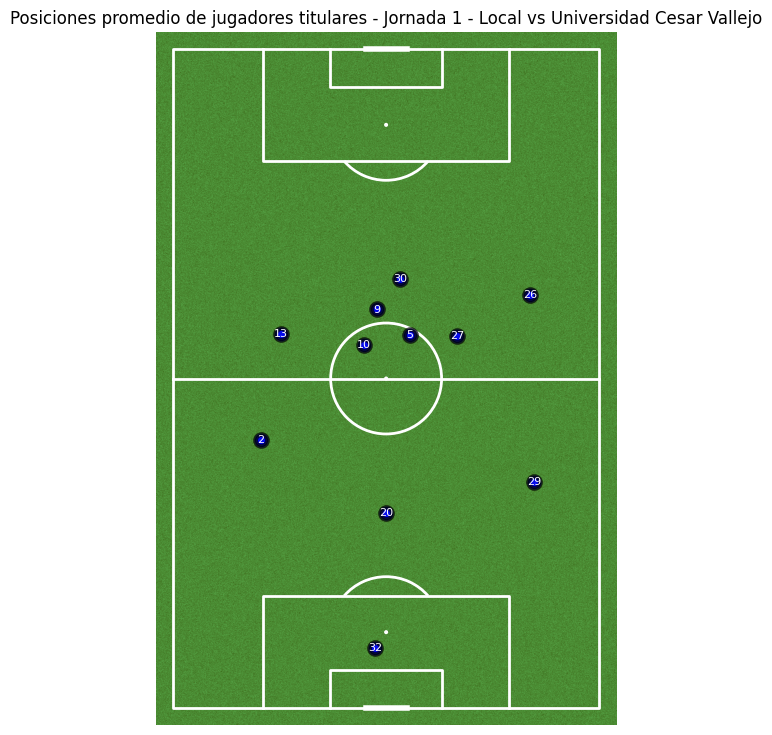

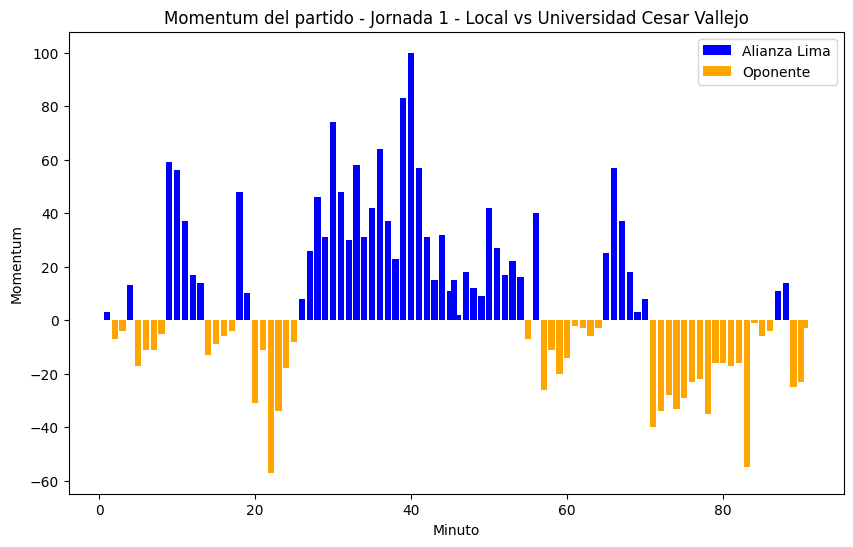

### Jornada 2 - Visita vs Alianza Atlético de Sullana - Estadísticas del Equipo

,Estadistica,Completado,Intentado
0,Expected goals,1.3,-
0,Ball possession,60.0,-
0,Total shots,8.0,-
1,Shots on target,4.0,-
2,Shots off target,4.0,-
3,Blocked shots,0.0,-
0,Corner kicks,2.0,-
1,Offsides,2.0,-
2,Fouls,12.0,-
3,Yellow cards,3.0,-


### Jornada 2 - Visita vs Alianza Atlético de Sullana - Información de Jugadores

,name,shortName,position,jerseyNumber,country,substitute,totalPass,accuratePass,totalLongBalls,accurateLongBalls,...,wonContest,totalOffside,bigChanceCreated,onTargetScoringAttempt,goals,goalAssist,bigChanceMissed,penaltyWon,penaltyMiss,captain
0,Franco Saravia,F. Saravia,G,32,Peru,False,20.0,14.0,11.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jiovany Ramos,J. Ramos,D,29,Panama,False,48.0,40.0,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aldair Fuentes,A. Fuentes,M,20,Peru,False,22.0,17.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Juan Freytes,J. Freytes,D,2,Argentina,False,48.0,39.0,10.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kevin Serna,K. Serna,M,26,Colombia,False,23.0,14.0,3.0,2.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Catriel Cabellos,C. Cabellos,M,27,Peru,False,25.0,20.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Sebastián Rodríguez,S. Rodríguez,M,10,Uruguay,False,70.0,59.0,9.0,7.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,Jesús Castillo,J. Castillo,M,15,Peru,False,26.0,12.0,6.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Ricardo Lagos,R. Lagos,D,13,Peru,False,17.0,7.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Cecilio Waterman,C. Waterman,F,30,Panama,False,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0


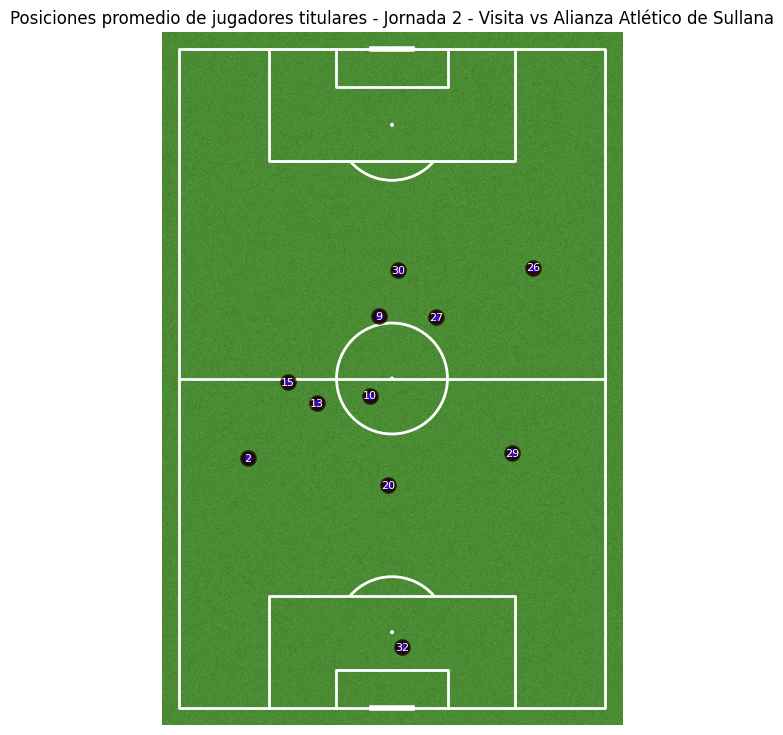

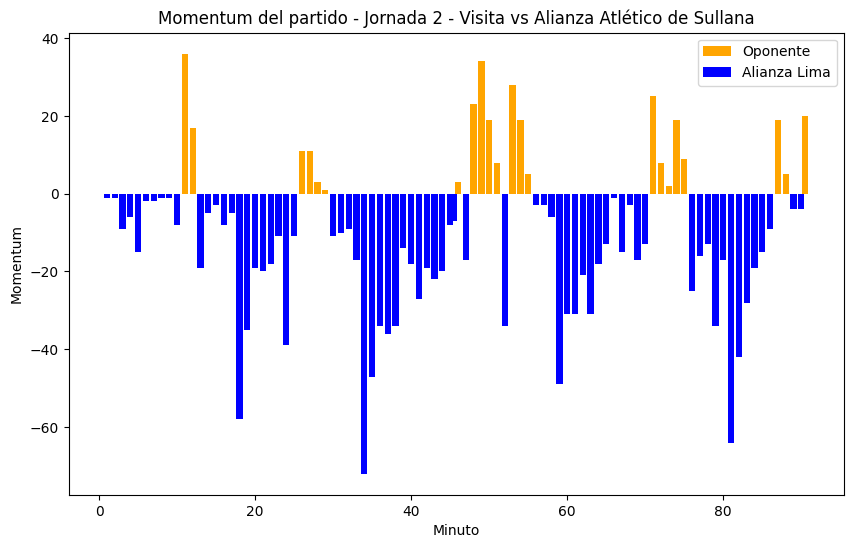

### Jornada 3 - Local vs Universitario de Deportes - Estadísticas del Equipo

,Estadistica,Completado,Intentado
0,Expected goals,1.43,-
0,Ball possession,61.00,-
0,Total shots,18.00,-
1,Shots on target,5.00,-
2,Shots off target,10.00,-
3,Blocked shots,3.00,-
0,Corner kicks,8.00,-
1,Offsides,2.00,-
2,Fouls,15.00,-
3,Yellow cards,2.00,-


### Jornada 3 - Local vs Universitario de Deportes - Información de Jugadores

,name,shortName,position,jerseyNumber,country,substitute,totalPass,accuratePass,totalLongBalls,accurateLongBalls,...,wasFouled,keyPass,bigChanceCreated,blockedScoringAttempt,challengeLost,onTargetScoringAttempt,hitWoodwork,bigChanceMissed,totalOffside,captain
0,Franco Saravia,F. Saravia,G,32,Peru,False,24.0,19.0,10.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jiovany Ramos,J. Ramos,D,29,Panama,False,38.0,32.0,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aldair Fuentes,A. Fuentes,M,20,Peru,False,34.0,31.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Juan Freytes,J. Freytes,D,2,Argentina,False,65.0,45.0,21.0,6.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kevin Serna,K. Serna,M,26,Colombia,False,21.0,17.0,3.0,2.0,...,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Catriel Cabellos,C. Cabellos,M,27,Peru,False,11.0,11.0,0.0,0.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6,Adrián Arregui,A. Arregui,M,5,Argentina,False,42.0,33.0,4.0,3.0,...,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
7,Sebastián Rodríguez,S. Rodríguez,M,10,Uruguay,False,44.0,38.0,6.0,5.0,...,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Jhamir D´Arrigo,J. D´Arrigo,M,11,Peru,False,22.0,17.0,4.0,2.0,...,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Cecilio Waterman,C. Waterman,F,30,Panama,False,11.0,4.0,1.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


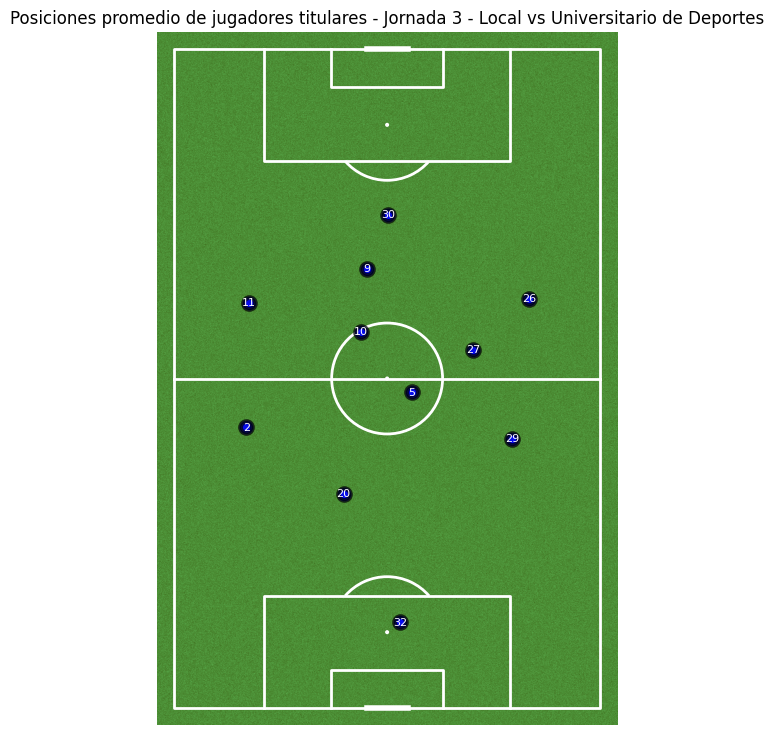

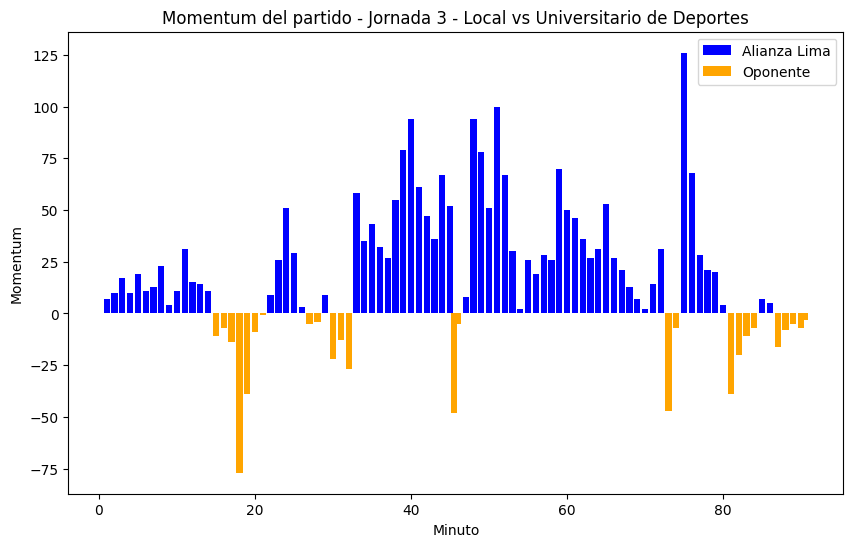

### Jornada 4 - Visita vs Unión Comercio - Estadísticas del Equipo

,Estadistica,Completado,Intentado
0,Expected goals,1.56,-
0,Ball possession,54.00,-
0,Total shots,14.00,-
1,Shots on target,5.00,-
2,Shots off target,6.00,-
3,Blocked shots,3.00,-
0,Corner kicks,8.00,-
1,Offsides,3.00,-
2,Fouls,8.00,-
3,Yellow cards,2.00,-


### Jornada 4 - Visita vs Unión Comercio - Información de Jugadores

,name,shortName,position,jerseyNumber,country,substitute,totalPass,accuratePass,totalLongBalls,accurateLongBalls,...,challengeLost,shotOffTarget,onTargetScoringAttempt,totalCross,accurateCross,bigChanceMissed,goalAssist,goals,totalOffside,captain
0,Ángel De la Cruz,Á. D. l. Cruz,G,12,Peru,False,22.0,9.0,16.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Catriel Cabellos,C. Cabellos,M,27,Peru,False,17.0,12.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Renzo Garces,R. Garces,D,6,Peru,False,42.0,29.0,10.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Juan Freytes,J. Freytes,D,2,Argentina,False,39.0,25.0,12.0,5.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ricardo Lagos,R. Lagos,D,13,Peru,False,24.0,21.0,0.0,0.0,...,1.0,1.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0
5,Kevin Serna,K. Serna,M,26,Colombia,False,21.0,16.0,3.0,1.0,...,2.0,0.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0
6,Adrián Arregui,A. Arregui,M,5,Argentina,False,45.0,40.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Sebastián Rodríguez,S. Rodríguez,M,10,Uruguay,False,41.0,34.0,1.0,1.0,...,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
8,Gabriel Costa,G. Costa,M,8,Peru,False,38.0,34.0,0.0,0.0,...,0.0,0.0,0.0,6.0,4.0,0.0,1.0,0.0,0.0,0.0
9,Hernán Barcos,H. Barcos,F,9,Argentina,False,32.0,23.0,2.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,True


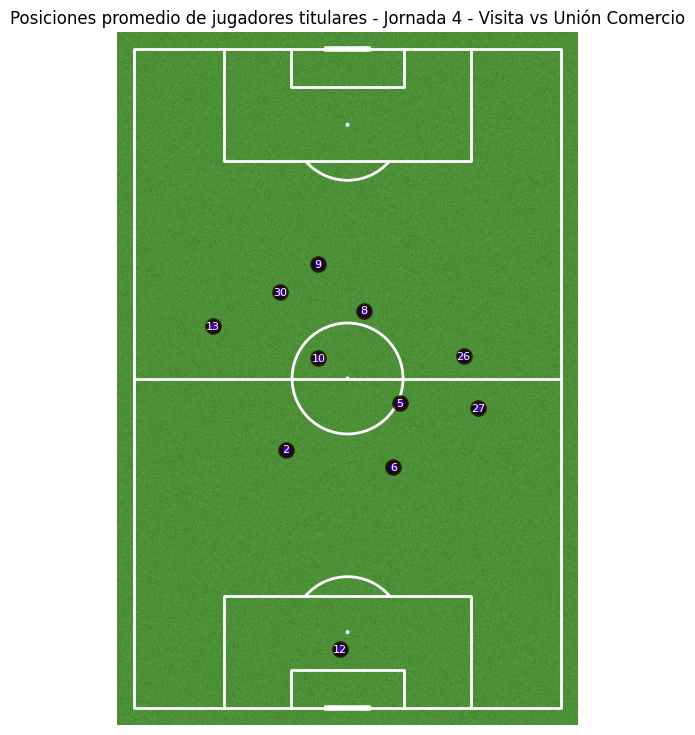

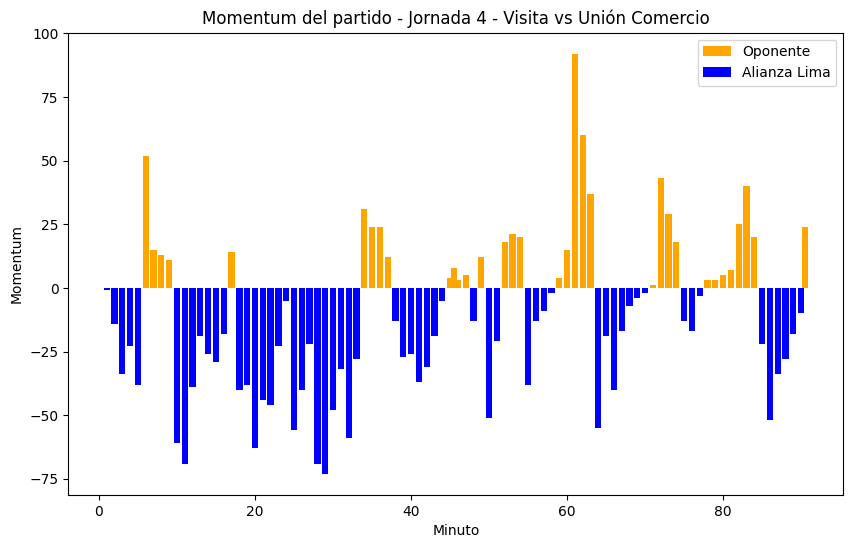

In [ ]:
# Impresion del reporte

from IPython.display import display, Markdown

for nombre_jornada, df in jornadas_df.items():
    # Procesa el DataFrame de estadísticas del equipo
    
    display(Markdown(f"### {nombre_jornada} - Estadísticas del Equipo"))
    display(df)
    
    display(Markdown(f"### {nombre_jornada} - Información de Jugadores"))
    display(jornadas_jugadores_df[nombre_jornada])

    # Comprobamos si Alianza Lima juega de local o visita en la jornada actual
    es_local = 'Local' in nombre_jornada
    
    # Combina los DataFrames para tener la información de si son suplentes y sus posiciones
    df_pos_jugadores = posicion_jugadores_dfs[nombre_jornada]
    
    df_combinado = df_pos_jugadores.merge(jornadas_jugadores_df[nombre_jornada], left_on='name', right_on='name')

    # Filtra para obtener solo los jugadores titulares (Suplente == False)
    df_titulares = df_combinado[df_combinado['substitute'] == False]
    
    
    # Crea el gráfico de posiciones promedio para los jugadores titulares
    fig, ax = plt.subplots(figsize=(16,9))
    pitch = VerticalPitch(pitch_type='opta', pitch_color='grass', line_color='white')
    pitch.draw(ax=ax)
    scatter_plot = pitch.scatter(df_titulares.averageX, df_titulares.averageY, ax=ax, s=100, color='blue' if es_local else 'red', edgecolors='black', linewidth=2, alpha=0.7)
    for index, row in df_titulares.iterrows():
        # Dibuja el marcador con pitch.scatter
        pitch.scatter(row['averageX'], row['averageY'], s=50, ax=ax, color='blue', edgecolors='black', linewidth=2, alpha=0.7)
        # Coloca el número del jersey encima del marcador
        ax.text(row['averageY'], row['averageX'], row['jerseyNumber_x'], fontsize=8, ha='center', va='center', color='white')

    plt.title(f"Posiciones promedio de jugadores titulares - {nombre_jornada}")
    plt.show()

    # Genera y muestra el gráfico de momentum para la jornada actual
    momentum_df = momentum_dfs[nombre_jornada]
    momentum_positivo = momentum_df[momentum_df['value'] > 0]
    momentum_negativo = momentum_df[momentum_df['value'] < 0]
    
    plt.figure(figsize=(10, 6))
    
    # Si Alianza Lima es local, sus valores positivos de momentum se muestran en azul
    # y los valores negativos (del equipo visitante) se muestran en naranja.
    # Si Alianza Lima es visitante, es al revés.
    plt.bar(momentum_positivo.minute, momentum_positivo.value, color='blue' if es_local else 'orange', label='Alianza Lima' if es_local else 'Oponente')
    plt.bar(momentum_negativo.minute, momentum_negativo.value, color='orange' if es_local else 'blue', label='Oponente' if es_local else 'Alianza Lima')

    plt.xlabel('Minuto')
    plt.ylabel('Momentum')
    plt.title(f"Momentum del partido - {nombre_jornada}")
    plt.legend()
    plt.show()


